In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

(a) Plot the graph with given code, the result should be same as this.
![](originalData.png)
`x_train` and `y_train` are the datas you need to create, `sample_size` is 10 and `std` is 0.25. 

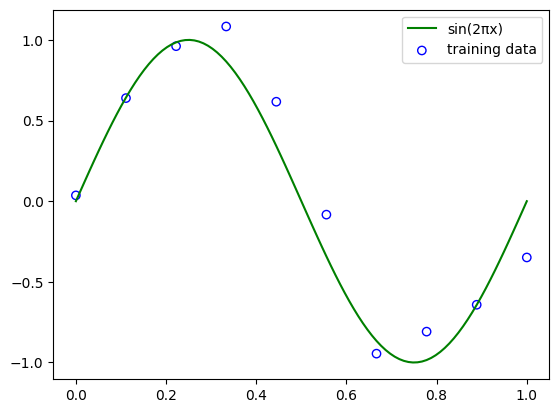

In [12]:
# Write you codes here.
x_train, y_train = create_toy_data(func, 10,0.25)
x_test = np.linspace(0,1,100)
plt.plot(x_test, np.sin(2*np.pi*x_test), 'green', label = 'sin(2πx)')
plt.scatter(x_train, y_train, marker='o', facecolors='none', edgecolors='blue', label = 'training data')
plt.legend()

(b) On the basis of the results, you should try $0^{th}$ order polynomial, $1^{st}$ order polynomial, $3^{rd}$ order polynomial and some other order polynomial, show the results include fitting and over-fitting.
![](fitting.png)

In [33]:
import itertools, functools
class PolynomialFeature(object):
    """
    polynomial features

    transforms input array with polynomial features

    Example
    =======
    x =
    [[a, b],
    [c, d]]

    y = PolynomialFeatures(degree=2).transform(x)
    y =
    [[1, a, b, a^2, a * b, b^2],
    [1, c, d, c^2, c * d, d^2]]
    """

    def __init__(self, degree=2):
        """
        construct polynomial features

        Parameters
        ----------
        degree : int
            degree of polynomial
        """
        assert isinstance(degree, int)
        self.degree = degree

    def transform(self, x):
        """
        transforms input array with polynomial features

        Parameters
        ----------
        x : (sample_size, n) ndarray
            input array

        Returns
        -------
        output : (sample_size, 1 + nC1 + ... + nCd) ndarray
            polynomial features
        """
        if x.ndim == 1:
            x = x[:, None]
        x_t = x.transpose()
        features = [np.ones(len(x))]
        for degree in range(1, self.degree + 1):
            for items in itertools.combinations_with_replacement(x_t, degree):
                features.append(functools.reduce(lambda x, y: x * y, items))
        return np.asarray(features).transpose()
    
class Regression(object):
    """
    Base class for regressors
    """
    pass
    
class LinearRegression(Regression):
    """
    Linear regression model
    y = X @ w
    t ~ N(t|X @ w, var)
    """

    def fit(self, X:np.ndarray, t:np.ndarray):
        """
        perform least squares fitting

        Parameters
        ----------
        X : (N, D) np.ndarray
            training independent variable
        t : (N,) np.ndarray
            training dependent variable
        """
        self.w = np.linalg.pinv(X) @ t
        self.var = np.mean(np.square(X @ self.w - t))

    def predict(self, X:np.ndarray, return_std:bool=False):
        """
        make prediction given input

        Parameters
        ----------
        X : (N, D) np.ndarray
            samples to predict their output
        return_std : bool, optional
            returns standard deviation of each predition if True

        Returns
        -------
        y : (N,) np.ndarray
            prediction of each sample
        y_std : (N,) np.ndarray
            standard deviation of each predition
        """
        y = X @ self.w
        if return_std:
            y_std = np.sqrt(self.var) + np.zeros_like(y)
            return y, y_std
        return y

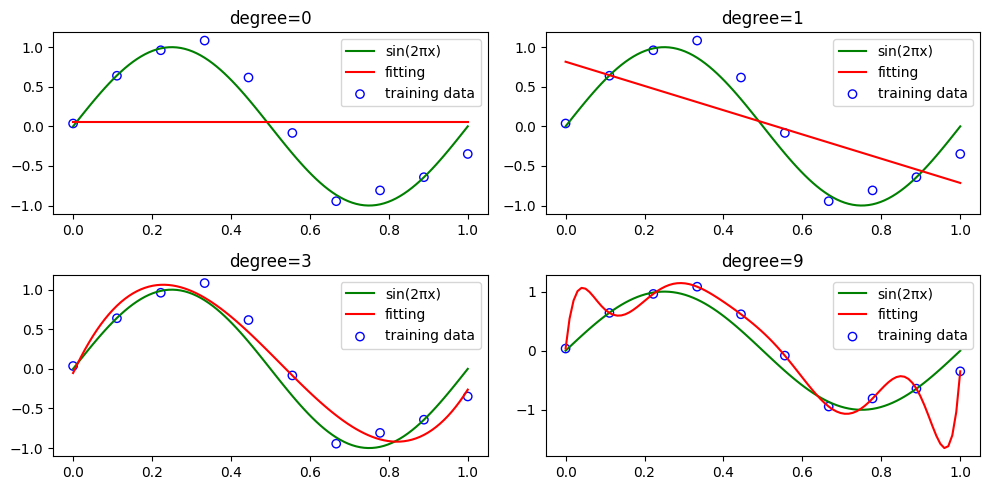

In [13]:
# Write your codes here.
X_train_degree = []
for i in range(10):
    X_train_degree.append(PolynomialFeature(degree=i).transform(x_train))

X_test_degree = []
for i in range(10):
    X_test_degree.append(PolynomialFeature(degree=i).transform(x_test))

model = []
for i in range(10):
    m = LinearRegression()
    m.fit(X_train_degree[i],y_train)
    model.append(m)

x_test = np.linspace(0,1,100)

fig, [[ax0,ax1],[ax2,ax3]] = plt.subplots(2,2,figsize=(10,5))

ax0.plot(x_test, np.sin(2*np.pi*x_test), 'green', label = 'sin(2πx)')
ax0.plot(x_test, model[0].predict(PolynomialFeature(degree=0).transform(x_test)), 'red', label='fitting')
ax0.scatter(x_train, y_train, marker='o', facecolors='none', edgecolors='blue', label = 'training data')
ax0.set_title('degree=0')
ax0.legend()

ax1.plot(x_test, np.sin(2*np.pi*x_test), 'green', label = 'sin(2πx)')
ax1.plot(x_test, model[1].predict(PolynomialFeature(degree=1).transform(x_test)), 'red', label='fitting')
ax1.scatter(x_train, y_train, marker='o', facecolors='none', edgecolors='blue', label = 'training data')
ax1.set_title('degree=1')
ax1.legend()

ax2.plot(x_test, np.sin(2*np.pi*x_test), 'green', label = 'sin(2πx)')
ax2.plot(x_test, model[3].predict(PolynomialFeature(degree=3).transform(x_test)), 'red', label='fitting')
ax2.scatter(x_train, y_train, marker='o', facecolors='none', edgecolors='blue', label = 'training data')
ax2.set_title('degree=3')
ax2.legend()

ax3.plot(x_test, np.sin(2*np.pi*x_test), 'green', label = 'sin(2πx)')
ax3.plot(x_test, model[9].predict(PolynomialFeature(degree=9).transform(x_test)), 'red', label='fitting')
ax3.scatter(x_train, y_train, marker='o', facecolors='none', edgecolors='blue', label = 'training data')
ax3.set_title('degree=9')
ax3.legend()

plt.tight_layout()
plt.show()

(c) Plot the graph of the root-mean-square error.
![](rmse.png)

In [14]:
def rmse(a, b):
    # Complete this function
    return np.sqrt(np.sum(np.power(a-b,2))/a.shape[0])

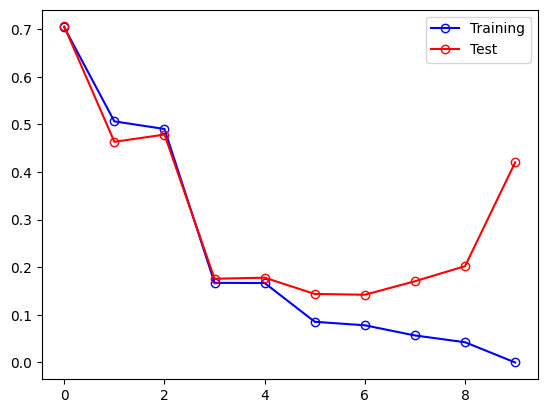

In [15]:
# Write your codes here.
training_errors = []
test_errors = []

degree = [i for i in range(10)]
for d in degree:
    training_errors.append(rmse(model[d].predict(X_train_degree[d]), y_train))
    test_errors.append(rmse(model[d].predict(X_test_degree[d]), y_test))

plt.plot(degree,training_errors, 'blue',marker='o', markerfacecolor='none', label='Training')
plt.plot(degree,test_errors, 'red',marker='o', markerfacecolor='none', label='Test')
plt.legend()

(d) Plot the graph of the predictive distribution resulting from a Bayesian treatment of polynomial curve fitting using an M=9 polynomial, with the fixed parameters $\alpha=5\times 10^{-3}$ and $\beta=11.1$(corresponding to the known noise variance).
![](bayesianRegression.png)

In [17]:
class BayesianRegression(Regression):
    """
    Bayesian regression model

    w ~ N(w|0, alpha^(-1)I)
    y = X @ w
    t ~ N(t|X @ w, beta^(-1))
    """

    def __init__(self, alpha:float=1., beta:float=1.):
        self.alpha = alpha
        self.beta = beta
        self.w_mean = None
        self.w_precision = None

    def _is_prior_defined(self) -> bool:
        return self.w_mean is not None and self.w_precision is not None

    def _get_prior(self, ndim:int) -> tuple:
        if self._is_prior_defined():
            return self.w_mean, self.w_precision
        else:
            return np.zeros(ndim), self.alpha * np.eye(ndim)

    def fit(self, X:np.ndarray, t:np.ndarray):
        """
        bayesian update of parameters given training dataset

        Parameters
        ----------
        X : (N, n_features) np.ndarray
            training data independent variable
        t : (N,) np.ndarray
            training data dependent variable
        """

        mean_prev, precision_prev = self._get_prior(np.size(X, 1))

        w_precision = precision_prev + self.beta * X.T @ X
        w_mean = np.linalg.solve(
            w_precision,
            precision_prev @ mean_prev + self.beta * X.T @ t
        )
        self.w_mean = w_mean
        self.w_precision = w_precision
        self.w_cov = np.linalg.inv(self.w_precision)

    def predict(self, X:np.ndarray, return_std:bool=False, sample_size:int=None):
        """
        return mean (and standard deviation) of predictive distribution

        Parameters
        ----------
        X : (N, n_features) np.ndarray
            independent variable
        return_std : bool, optional
            flag to return standard deviation (the default is False)
        sample_size : int, optional
            number of samples to draw from the predictive distribution
            (the default is None, no sampling from the distribution)

        Returns
        -------
        y : (N,) np.ndarray
            mean of the predictive distribution
        y_std : (N,) np.ndarray
            standard deviation of the predictive distribution
        y_sample : (N, sample_size) np.ndarray
            samples from the predictive distribution
        """

        if sample_size is not None:
            w_sample = np.random.multivariate_normal(
                self.w_mean, self.w_cov, size=sample_size
            )
            y_sample = X @ w_sample.T
            return y_sample
        y = X @ self.w_mean
        if return_std:
            y_var = 1 / self.beta + np.sum(X @ self.w_cov * X, axis=1)
            y_std = np.sqrt(y_var)
            return y, y_std
        return y

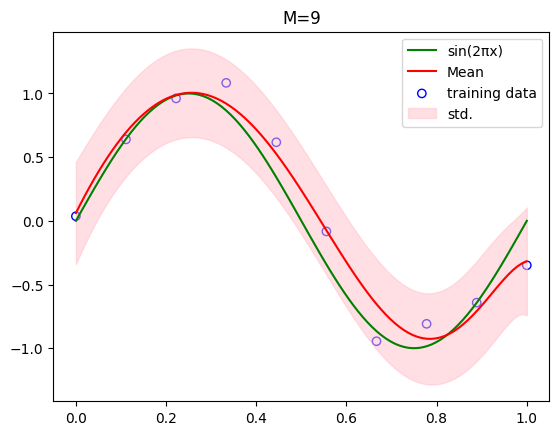

In [42]:
# Write your codes here.
alpha = 5e-3
beta = 11.1
Model = BayesianRegression(alpha, beta)
Model.fit(X_train_degree[9], y_train)
mean, std =Model.predict(X_test_degree[9], return_std=True)

plt.plot(x_test, np.sin(2*np.pi*x_test), 'green', label='sin(2πx)')
plt.plot(x_test, mean, 'red', label="Mean")
plt.scatter(x_train, y_train, facecolor='none', edgecolor='b', label="training data")
plt.fill_between(x_test, mean - std, mean + std, color="pink", label="std.", alpha=0.5)
plt.title("M=9")
plt.legend()

(e) Change the $sample\_size$ to 2, 3 or 10 times than before, explain the change of $M$.

C:\Users\谢嘉楠\AppData\Local\Temp\ipykernel_16460\4006033840.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train_sample = np.array(X_train_sample)
C:\Users\谢嘉楠\AppData\Local\Temp\ipykernel_16460\4006033840.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y_train_sample = np.array(Y_train_sample)


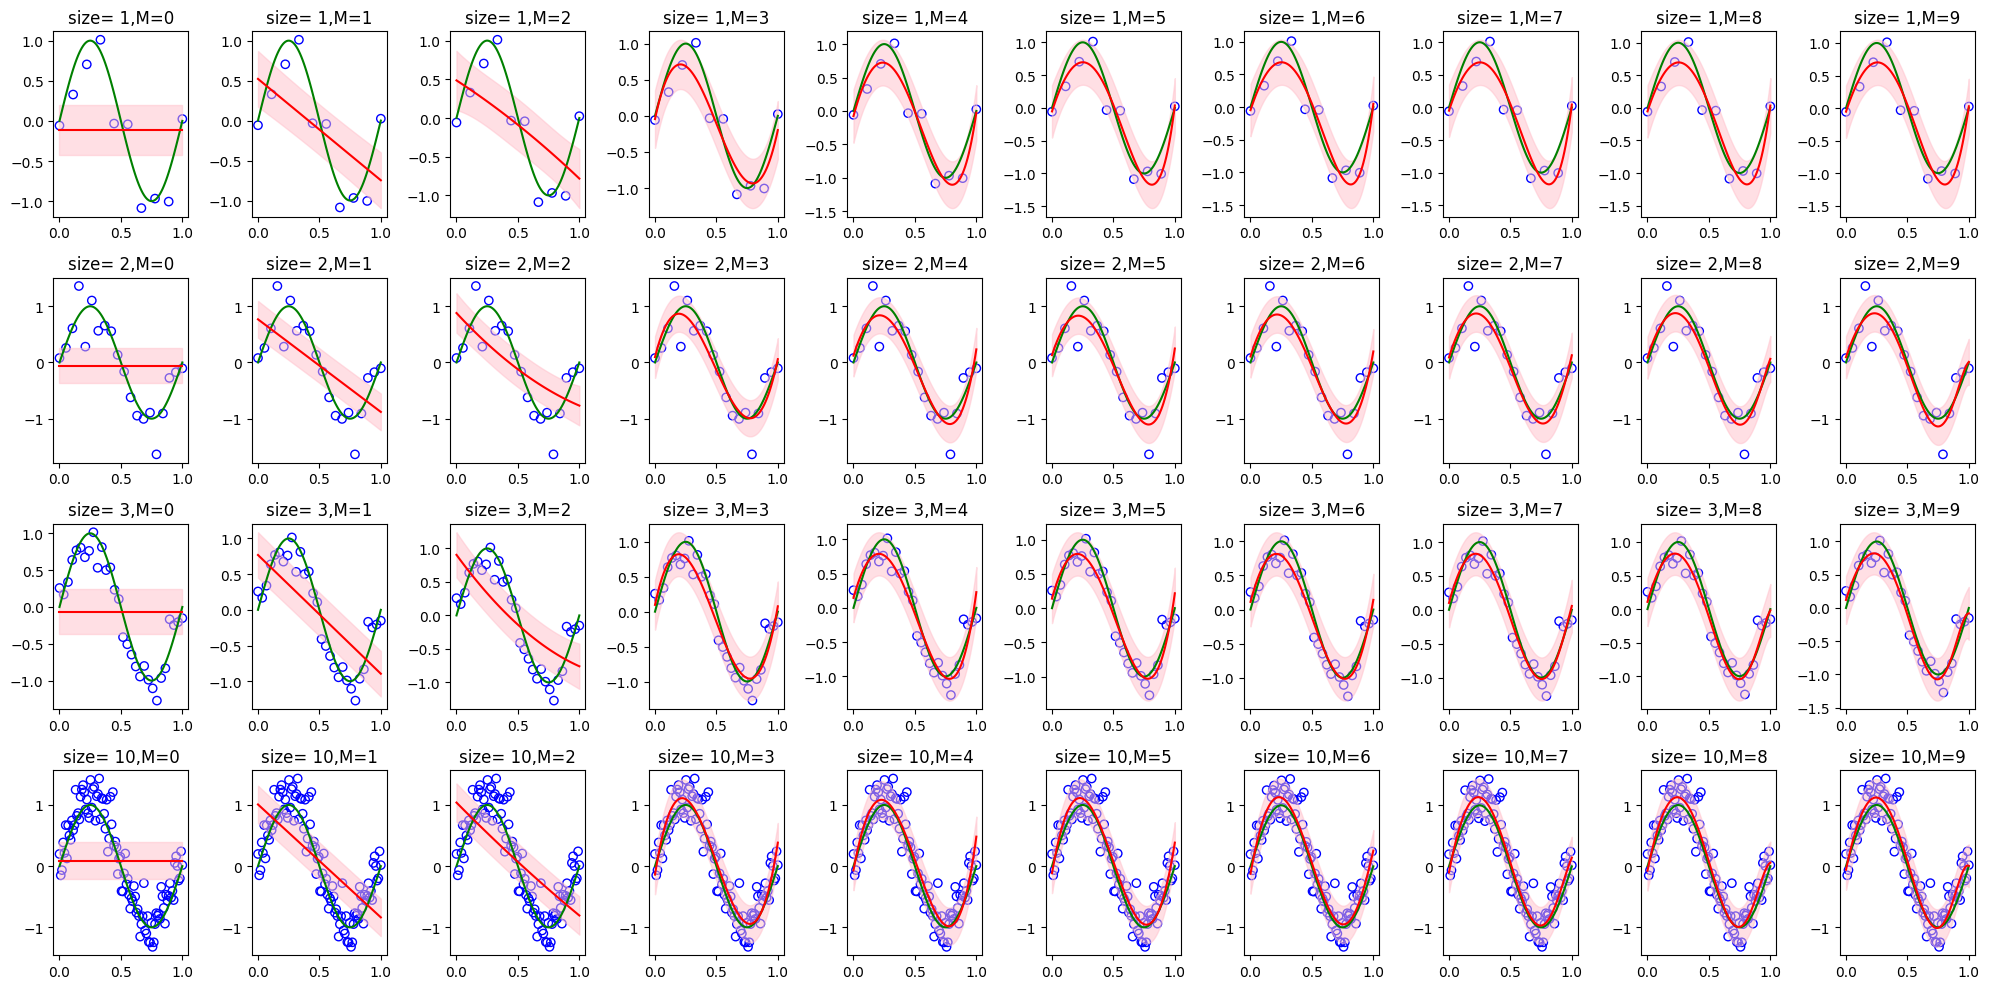

In [85]:
sample_size = [1,2,3,10]
M = [i for i in range(10)]
X_train_sample = []
Y_train_sample = []

for size in sample_size:
    x, y = create_toy_data(func, 10*size,0.25)
    X_train_sample.append(x)
    Y_train_sample.append(y)

X_train_sample = np.array(X_train_sample)
Y_train_sample = np.array(Y_train_sample)


mean_pred = []
std_pred = []
for id in range(len(sample_size)):
    mean_temp = []
    std_temp = []
    for m in M:
        model = BayesianRegression(alpha, beta)
        model.fit(PolynomialFeature(degree=m).transform(X_train_sample[id]),Y_train_sample[id])
        mean, std = model.predict(PolynomialFeature(degree=m).transform(x_test), return_std=True)
        mean_temp.append(mean)
        std_temp.append(std)
    mean_pred.append(mean_temp)
    std_pred.append(std_temp)


fig, ax = plt.subplots(4,10,figsize=(20,10))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        ax[i,j].plot(x_test, y_test, 'green', label='sin(2πx)')
        ax[i,j].plot(x_test, mean_pred[i][j], 'red', label='mean')
        ax[i,j].scatter(X_train_sample[i], Y_train_sample[i], facecolor='none', edgecolor='b', label="training data")
        ax[i,j].fill_between(x_test, mean_pred[i][j] - std_pred[i][j], mean_pred[i][j] + std_pred[i][j], color="pink", label="std.", alpha=0.5)
        ax[i,j].set_title('size= %d,M=%d'%(sample_size[i],j))   

plt.tight_layout()
plt.show()

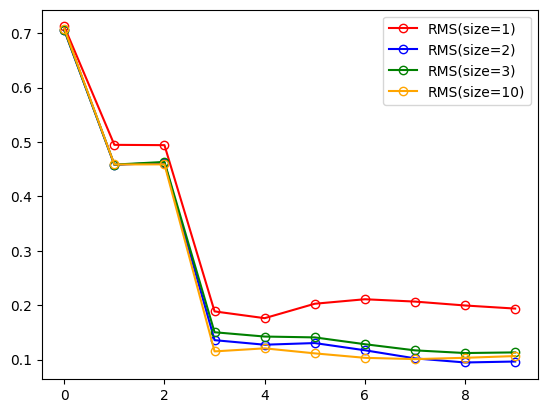

In [87]:
test_errors = []

degree = [i for i in range(10)]

for i in range(len(sample_size)):
    error = []
    for j in range(len(M)):
        error.append(rmse(mean_pred[i][j], y_test))
    test_errors.append(error)
colors = ['red', 'blue', 'green', 'orange']
for i in range(len(sample_size)):
    plt.plot(M,test_errors[i], colors[i],marker='o', markerfacecolor='none', label='RMS(size=%d)'%(sample_size[i]))

plt.legend()
plt.show()